In [1]:
import librosa
import os
import util
import numpy as np
import numpy
from matplotlib import pyplot as plt

import IPython.display as ipd


def generate_sine(f0, sr, ):
    n_dur = len(f0)
    n = np.arange(n_dur)
    return 0.2*np.sin(2*np.pi*f0*n/float(sr))


def generate_sine(f0, sr, n_duration):
    n = numpy.arange(n_duration)
    return 0.2*numpy.sin(2*numpy.pi*f0*n/float(sr))


# def estimate_pitch_and_generate_sine(x, onset_samples, i, sr):
#     return generate_sine(f0, sr, n1-n0)



def estimate_pitch(segment, sr, fmin=50.0, fmax=2000.0):
    
    # Compute autocorrelation of input segment.
    r = librosa.autocorrelate(segment)
    
    # Define lower and upper limits for the autocorrelation argmax.
    i_min = sr/fmax
    i_max = sr/fmin
    r[:int(i_min)] = 0
    r[int(i_max):] = 0
    
    # Find the location of the maximum autocorrelation.
    i = r.argmax()
    f0 = float(sr)/i
    return f0

def estimate_pitch_and_generate_sine(x, onset_samples, i, sr):
    n0 = onset_samples[i]
    n1 = onset_samples[i+1]
    f0 = estimate_pitch(x[n0:n1], sr)
    return generate_sine(f0, sr, n1-n0)


In [2]:
dname = 'sample'
bname = 'violin-spec.wav'
fname = os.path.join(*[dname,bname])
# print fname
# ali = 'valleys'
ali = 'freqs_abs'
ali = 'freqs'
# thres = 0.05
# ali = 'valleys_%d' % thres
# ali = 'comp_256'
p = util.piece( fname, alias = ali)
p.set_wavelet('morlet')
p.set_pdir('gallery1/')

In [13]:
##### wavelet transformation

# p.plot(0,0.05, scale = np.arange(1,80))
# p.plot(0,0.05, scale = np.arange(1,129))
# scale = np.arange(25,175)

# freqs = p.bitrate * np.power(10,np.linspace(1.5,4.3,60))
# scale = p.bitrate / freqs 
omega = 25
logfmin = np.log10( p.bitrate / omega )
logfmax = np.log10( 50 / omega )

freqs = np.power(10, np.linspace( logfmin, logfmax,100) )
scale = 1./ freqs
# scale = np.linspace(15,500,100)
tmin = 10.
tmax = 17.5
coef, freqs = p.cwt( tmin, tmax, scale, p = omega )
# pks  = util.detect_peaks( - np.log10( 1 + 10*abs(coef)), ry = 20 )

im = np.log10( 1 + 10*abs(coef))
# plt
im

array([[ 3.45539188,  3.436198  ,  3.41499555, ...,  3.50177497,
         3.48809333,  3.47266109],
       [ 3.99206203,  3.99725871,  4.00212898, ...,  3.97441592,
         3.98065067,  3.98652932],
       [ 4.27179499,  4.27854635,  4.28489645, ...,  4.24911181,
         4.25707982,  4.26464019],
       ..., 
       [ 3.27225788,  3.27225726,  3.27225664, ...,  3.27225973,
         3.27225911,  3.2722585 ],
       [ 2.98169942,  2.98168975,  2.98168007, ...,  2.98172846,
         2.98171878,  2.9817091 ],
       [ 3.89625018,  3.89625018,  3.89625018, ...,  3.89625019,
         3.89625019,  3.89625019]])

In [26]:
p.__dict__

{'alias': 'freqs',
 'bitrate': 44100,
 'dirname': '',
 'fname': 'sample/violin-spec.wav',
 'motherwave': 'morlet',
 'pdir': 'gallery1/',
 't0': array([  0.00000000e+00,   2.26757370e-05,   4.53514739e-05, ...,
          5.92247166e+00,   5.92249433e+00,   5.92251701e+00]),
 'x0': array([  3.43071883e-06,   5.48131356e-06,  -9.49183959e-06, ...,
         -2.67254189e-03,  -2.12473655e-03,  -1.28164771e-03], dtype=float32),
 'xs': array([  3.43071883e-06,   5.48131356e-06,  -9.49183959e-06, ...,
         -2.67254189e-03,  -2.12473655e-03,  -1.28164771e-03], dtype=float32)}

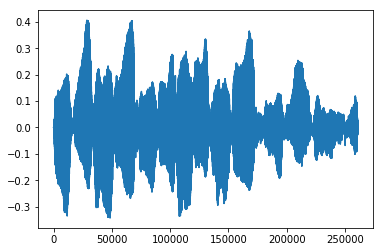

In [23]:
%matplotlib inline
plt.plot(p.xs)

In [87]:
dname = 'sample'
bname = 'violin-spec.wav'
fname = os.path.join(*[dname,bname])
# print fname
# ali = 'valleys'
ali = 'freqs_abs'
ali = 'freqs'
# thres = 0.05
# ali = 'valleys_%d' % thres
# ali = 'comp_256'
p = util.piece( fname, alias = ali)
p.set_wavelet('morlet')
p.set_pdir('gallery1/')

In [48]:
dname = '/home/shouldsee/Downloads/Ant Videos/mangor/Latin_Melody/Track 1.wav'
bname = ''
fname = dname
# fname = os.path.join(*[dname,bname])
# print fname
# ali = 'valleys'
ali = 'freqs_abs'
ali = 'freqs'
# thres = 0.05
# ali = 'valleys_%d' % thres
# ali = 'comp_256'
p = util.piece( fname, alias = ali)
p.set_wavelet('morlet')
p.set_pdir('gallery1/')

In [68]:
# p.extract([30,60])
# ?p.extract
# inspect(p.extract)
import inspect
inspect.getsourcelines(p.extract)
p.trimto(30,40)
p.play(30,40)


<source src="data:audio/wav;base64,UklGRnR1DQBXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YVB1DQAn+MX5ufvH/QMAKwJDBAcGfQdbCNUIwghiCIwHlAZVBfkDbQLwAE//of3e+/n5U/iI9gv1hvNT8iTxUfDP74XvwO8h8NbwrfG78rPz1/Ta9eX29/c8+X766ftq/ev+awDKAQUD+QPFBEoF1wX8BVUGhQbhBiAHeQe0B+8HIwg6CC4IGAj3B9IHiAdCB9YGhQYhBu0FnAWYBX4FpwW5BQcGWAbWBm4H6Ad1CJII4Ai/CNUIfAhBCK0H7AYwBjQFWgQ9A0EC6QC2/2L+L/3w+736nfmA+HH3RvY79Tj0U/NP8mbxl/DT7yzvaO7J7RTtg+z+68bruOv+67vs5+297wny6vQy+Pj7GQBsBMoIGQ1dEaEVuBm5HVch6SQMKPsqeC16L/Qw0jEGMnUxbzDMLvYsripHKFslNSKiHtkayRZvEgkOfAkeBcsA6Pw1+Qf2S/P38AfvT+3Z633qZ+mG6DjoKeiR6E7pVOql6+fsNO5n733wY/EN8njy4/Ja8+PzlfRg9S/2+/a791v4/fiK+TT6o/o7+6r7KPxf/JD8efxR/OL7Svtw+or5h/ie98/28PU79Xf07vNa8+vyePI28hzyFPIJ8iPyU/KO8sLy8vIB8yLzLvMf8zXzIvM180Dze/O68xP0e/Tb9Eb1hfXl9ST2kPba9kz3ofcc+LD4QPnN+T/63/po+wr8w/yI/bD+1P9JAbACTgTeBaUHWgkwCw4Ntw5dEKcRChMNFNwUSBVXFfoUWxQ6E+0RXRCpDsAM2wrgCCAHPwWkAwkCiAAq/+/9Df1R/Cj8JPzP/IT9wv79/4wBGAO+BDsGzgdECYYKvQuQDEUNZw1UDekMQgxOCx4KrAgGB0MFYgOMAbP/8/0+/MH6Lvnd91/2GvWo823yIPEO8PXuBO4t7Wbs4Os26+jql+qp6rzqautP7LrtWe9u8dDzqvbf+Xn9QgE/BVoJfQ2UEWUV4RgQHAYftyEZJDomHiijKfQqxytqLIQskiwgLIwreiotKXwnXyXmIvcf1xw2GYoVhRGADX8JnwURAqj+wPsJ+RH3QvU49HjzT/Og82j0qvUv9xD5+Pon/Qz/+wCEAv0DNAUzBtoGSQd1B0UHJAefBhYGJQUtBPMCngH9/1P+ovzf+kD5Y/fl9R70wvJU8SHw+O7J7b7sfOtN6vzos+c55hHlteOR4k/hJ+AR3zPeXN2y3DjcyduR21bbVts822nbhtvQ2zjchtw03fzdL9944DziCuQy5l3owOo57cTvT/LX9En3s/kO/Ej+gQCdAroE2gbGCKsKXAwYDnwP7hASEhUT2RNtFO8UKhVtFU8VKhWdFA0UTRN6EpARhhCOD3UOdQ03DAQLqAlQCPsGsgVoBAkDygGFAGz/V/5q/ab8HfzL+8v75ftj/CT9T/7J/4wBswMdBuQI0wsJDyUSZRVKGPYaLR0KH3UgXiHGIZUh9iClHw4e8huXGd8W+xPMEH0N5wlCBlMCU/4P+tr1dfFE7SXpTOXq4ffemNyH2hXZ8Nd21zTXftcv2EzZH9tG3RDg/OJ05vTpuu2A8Tf15/g6/KT/nQLMBbQIzAvKDtcR1RSqF3EathzpHqwgQCJdI0YkxyQKJeEkYCR+IyoifCBGHusbUBnFFisUjRHrDjsMwglCB/UElgKBAG3+pvzx+or5SPhM9632Dvaq9Ur1IfXq9Pj05vTx9PX0NPWj9Rn21vaW97v4q/nx+vz7Mv1M/ob/iACPAVcC/gJ4A80D1APYA6EDcANIA20DoQPnAzwEdwSkBL4E1wQeBT8FlAXMBSUGZwaxBrkGlwZYBqcF2wShA0UCjACh/mv8Lfr696P1g/NQ8WTve+2t6/jpb+hE523mJ+ZE5ufm1Ocl6Wfq0usi7ZHuKPDD8aTzfvXK99j5Ovxe/noARQKvA8wEdwXxBQAGIQb8BQAGuQV+BTgF2wR7BPIDbQOhAt0BzwDf/6H+i/19/GT7ifpw+az4pfcK9272LPYd9lH2tfaE96X4APqq+2b9Wv8zAQwD4wR2BgkIFAkXCpwKDwshC/kKkQoQCnAJygj3BysHHQYEBckDlgIgAaD/9/1C/HP6V/go9tDzcfH47pnsVOoT6ALmFeSJ4kThluA14EzgpeCr4RLjBuVs51jqf+0R8cj04Pjw/FQBbwWzCYwNOBGPFI0XNhpsHH0eCSBtIV0iPyOjIwMk+COfI/ki9iHGIBUfbx1lG24ZVRdiFXUTkBHYDysOuQxGCxMKzgiaB1gGNAUeBCMDXwKaAewAIQBP/3T+av2T/L37C/tz+tj5cPk8+Vr5lfkA+nf6C/u5+278Sf1I/k//UQBfAVsCbQNsBHoFawY+B+EHYgjGCOQIGwn+CCYJHwk1CS4JSAleCYcJiglPCfYIcQjdBxkHSgZgBV0EbQN4AnUBRgA1/9L9l/wW+6/5HPi89jv13/OD8jLx/O/f7gjuG+2W7Ans2eu46+Traewi7U7uhe9X8SbzgfXz97r6mv21AN8D0gbRCWcM+g4lEToT0RRDFlIXCxh6GIEYNxh6F5UWGxWME3cRVw+bDMYJpgZtAxIA2vyv+eX2P/QU8h3wq+5W7XHsu+tf60nrcevg623sLe3f7dvute+18I/xZvIB83/z2/Pb88LzdPNE877yW/LS8UzxwPBj8DPw8O/w797vJPBn8MfwNvGL8bjxv/Ge8TLxy/Ah8L3vWe8p7/XuFu8776rvL/DL8KnxkvLn81z1Rfc1+VH7Y/2o/9kB/QMsBjYITgooDEUOCBD8EbEThxUTF7kYDRplG2gcQx3xHWMelB5nHg4eWR2CHEsbxxnmF68VVBPqEKkOiAynChQJ2QfhBnYGRgafBukGngdTCFYJVgpkC3YMYw1XDu8OcA9eD0gPtw4gDhEN9AuGChgJcgenBawDcgEu/9b8d/oF+Nr14/NP8hHxKPCm70LvTu9O77nv+O+M8PDwnvEq8tjykfND9Nf0TvWj9Zj1fvUW9br0LfTQ82XzH/Py8tXy1fLG8sbyt/K38nHyPfLv8cbxtPHK8dXx7PHv8QXyNvJ08tzyYfMT9Ob07fX09kz4dPnb+uX7JP0y/kf/JQAZARgCOQNoBGgFegZyB2oIHwm6CRMKZQqgCvEKPwunC+0LPgyFDMcM5QwGDSQNIA0DDcAMYwzMCx4LRwpLCT0IPgdnBsgFYAUaBS0FbwUzBi8HhAgXCtcLzg3cDwsSJxRdFkYYJxrGGxYd4h1GHiEenx1/HAEb7BiyFisUZBFmDkYLEQjBBEIBof0M+j72wvJg71PsTum35k3kQ+Ji4Mvea91s3JnbItsU217bKdxg3STfMeGb4xTmuuhf6wTunvAq86P1CfiY+v/8kf/3AYIE+wahCQsMXw5OEB0SwxNIFZwWnBdvGPAYRRlCGQYZXBh6F0cW7xRJE5AR3A8UDmcMrwouCZ4HTQbjBKgDYgJFAQcA+v7s/Q39RvyB+xL7aPom+rr5q/mK+ZX5uvnC+ef5zfkA+gD6JvoA+u75wvmG+Vr57/i3+Ej4GPi796H3iPeP96H3lvew94/3rfel98P33fcf+I74+vi++Wj6YPsh/Pf8lv0Y/mL+dP6A/hj+x/3//E38NPsP+rf4bvcD9pH0OfOl8STwgu4X7bDrpurw6Z/pgenE6YTqdeu37Bfuve918XTzRvVf91r5c/tx/Uf/JAG0AjwEZAWIBlgHIAiLCAUJKgliCXgJswnrCRMKPApSClIKQwopCvkJ3wm3CZUJZQkmCfYIoQhQCMMHQgeIBgMGVQUABb4EtgTjBEMFGQYkB6UIUgpGDCAOOBAWEugTZRXJFs8XohggGV8Zbhk6GeEYMBhgFzgW3BQ2E40Rvg/WDbULiglJB/kEsAIoAI/9wfrg99/09/H17jbsjOlp54TlN+Q74

In [88]:
#### librosa routine to identify pitch

x = p.xs
sr = p.bitrate
hop_length = 100

onset_samples = librosa.onset.onset_detect(x,
                                           sr=sr, units='samples', 
                                           hop_length=hop_length, 
                                           backtrack=False,
                                           pre_max=20,
                                           post_max=20,
                                           pre_avg=100,
                                           post_avg=100,
                                           delta=0.2,
                                           wait=0)



onset_boundaries = np.concatenate([[0], onset_samples, [len(x)]])
print onset_boundaries
onset_times = librosa.samples_to_time(onset_boundaries, sr=sr)
print onset_times

y = np.concatenate([
    estimate_pitch_and_generate_sine(x, onset_boundaries, i, sr=sr)
    for i in range(len(onset_boundaries)-1)
])

print "Done"

[     0   1400  11400  13500  18000  33000  50500  68900  72500  88200
  90700 103700 121300 132300 135400 151300 154200 171700 175000 181800
 196400 200000 222900 252100 261184]
[ 0.          0.03174603  0.2585034   0.30612245  0.40816327  0.74829932
  1.14512472  1.56235828  1.64399093  2.          2.05668934  2.35147392
  2.75056689  3.          3.07029478  3.430839    3.49659864  3.89342404
  3.96825397  4.12244898  4.45351474  4.53514739  5.05442177  5.71655329
  5.92253968]


In [89]:
ipd.display_html( ipd.Audio(p.xs, rate = p.bitrate) )
ipd.Audio(y, rate = p.bitrate)

<source src="data:audio/wav;base64,UklGRqT4BwBXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YYD4BwAAAAAAAAD8//f/8P/o/+D/3P/e/+P/7f/4/wQADgAUABcAFwATAA4ACgAFAP7/8//o/9v/1P/Z/+f/9v8BAAAA8P/X/7v/oP+Q/5L/oP+0/87/5f/0/wAABwAIAAoAEAAMAPn/3f/B/6n/m/+R/4n/iP+U/6P/rv+1/7X/t//J/+X/9v/z/+3/8f///xAAGgAOAO3/wf+N/0//D//W/rH+q/65/sP+0v74/i//cP/F/yMAeADBAO8A5QCvAG4ALgADABEAWwC8ABUBRQEuAeMAgwAUAKf/U/8U/9f+qv6O/nL+XP5m/pX+8P5+/yYAvgAzAYEBoAGKAUEB1ABcAOn/eP8M/7T+gv50/oj+t/7z/ir/Uv94/6T/x//W/9f/1v/Y/9r/z/+t/3X/LP/Z/on+Rf4O/uj93v32/Tb+oP4X/37/wP/P/6b/XP8L/8r+vP72/mr///+ZABYBXgFyAU8B+QCJABQAn/8p/7f+Tf4F/v/9Qv7D/nX/OQDnAGgBrwG0AX4BFgGGAPL/fv89/z//i/8JAJ0ANQG+ASICWQJbAiECuwE9Aa4AKADO/6P/mP+f/6b/l/9n/wn/bv6g/b787PtO+wT7Evtk++T7fvwb/aX9EP5d/on+mf6l/sr+D/9v/+L/QwB0AHcAYwBIADsARQBaAHgAowDPAP0APQGFAbMBxQHDAaQBZgEZAcMAcgA6ABgAEAApAFQAdACOAKYArwCtAKcAkwB6AHkAmgDWACwBhwHNAf4BHwIoAh0CCgLrAbEBRwGUAJX/Yv4a/df7t/rN+R/5rvh5+IH4vvgn+b75h/px+1b8HP29/S/+b/5+/l/+Kv7+/fH9G/6Q/kP/CwDMAGQBtgHJAagBUgHaAGcADQDX/9//MADLAK4BvQLFA6AENgVvBU4F6ARKBIkDzAIlAp8BVgFNAXIBvAEjAosC6QI3A2wDlQPIAwIENgRaBD4EoQNxAtMA9/4O/Uv7zvmm+NH3Qffy9uP2Cvdb99H3X/jv+Hn5/fl8+vH6T/uY++P7N/yO/OT8Of1+/a791P34/Rr+Nv48/jb+Pf5P/lz+bP6J/rf+E/+5/6AAsgHUAtIDigQCBTcFHwXTBGoE5wNgA/4C0gLiAicDhgPiAzMEbwSSBLEE2gQHBS8FRQUiBZgEjQP2Aer/nv1X+1r51ffG9hr2y/Xq9Xn2ZPeL+Mf59/ry+5r88/wK/ez8tPx2/C/86fu++7f70vsS/Gj8vvwX/X395f09/nL+Z/4f/rb9R/3y/OP8Mv3W/cn+BABrAdoCHwT9BFYFOwXOBDYEmQMNA6MCewKoAikD9gP9BAsG6waKB/QHOwhZCD8I2Af5BmsFKQNzAJr94Pp4+Hf27vT886rz6fOm9MD1APdL+Kj5//oV/Mf8EP0E/cn8f/wu/OT7rfuI+4L7q/sC/HL87Pxb/Zr9hP0K/UD8Ufth+ob55Pis+P345flo+2v9rf/YAakD+ASwBcsFZAWoBLcDugLmAWYBVQHEAagC2AMnBWkGgQdrCCcJoAnECZEJ4wh7B0YFcwJX/0n8kflg9+L1JvUC9Tn1n/UR9nv29/aq94X4YPkq+vP61vva/Nb9lP7//iD/Av+1/lv+GP4D/iX+c/7A/tT+l/4O/jX9EPzC+nH5RfiD92z3Gfh++Xr7x/0LAPkBVgP/A/0DagNnAicB8/8J/5f+sf5N/0gAdwGpAsEDvQSpBYoGXwcMCFQI5geDBiAE+QB0/QH6EPcF9Qr0APSk9ML1Pvf8+Nj6pvwx/kX/0f/+/wIAAwAVADcAZQCtACkB1AGTAkoD3gMzBDoE5QM8A1oCXgFfAIb/8P6T/mL+af66/lH/KgBIAZsCBQRcBW8GGwdaBzcHwAb/BQUF7QPgAhECoQGIAbgBMwLyAukDHwWNBvkHFgmNCdIIcgaBApH9TPhg82zv1+zJ6yzst+0R8Ozy9fXP+Dn7Cv0f/n3+W/4C/qr9cf1f/ZP9PP5h/9AATwKkA50EGQX7BCYEpQK3AKX+sPwm+zj64/kO+qn6qvsJ/br+qACjAmMEswV1BqQGUwa0BeYE8wP9Aj4C2AHEAecBIAJaAosCqwLOAikD0QOgBE4FXwU7BJcBsP0D+SD0pe8U7Mfp6uhn6fTqS+0h8BDzwvUV+Oz5Mvv6+3v86vxh/er9kv55/7IAMQLaA4UFBwc/CAEJGgl8CDQHXwU/AzMBdf8R/g39ZPwb/GL8bv0//5sBOATJBgUJqQqNC7gLPQs4CusItwflBqIG8QaQBzoIywgVCf0IrAhTCOUHTQdfBrAE8QE5/sv5A/Vi8FfsIunz5uPl3uXP5o7o0epf7RTws/L39Mf2KPgx+Qn6wvpe+/j7w/zl/X7/iwHcAygGHwhvCeEJZgkYCEEGVASkAlgBgAANAOL///9/AHUB4AKpBKwGxwjQCosM0g2PDqwOMQ5LDTsMSAuqCnIKlAoGC7ALfAxsDXAOVA/qD+sPwQ7nC2oHvQFv+yH1du/c6oTndeWz5Dflxebk6DTrje3J77HxJ/Mx9P700PW49qH3hPh0+YT60ft5/XP/oAHXA84FLge9B10HKAaMBPoCpAGeAP//w//0/7kALgJEBNEGkgk3DIEONRArEV0R0BCRD/ENZwxMC9cKFwvTC74Mqw1xDvgOTw+DD4sPVg+YDrcMaAnrBKb/+PlO9Bbvsup555blFeX85QvoxerW7fjwrvOE9VL2RfbJ9Vb1FPUQ9XP1VPaw94T5rfvt/RsA/AEfA00DpQJVAbr/ZP6l/Xj91f2u/tb/OQHlAtIE7gY3CaQLHA52EIQSIRQwFZUVXxW/FPATKxOYEkgSTRKkEiITqRNIFPIUghXPFVgVYROeD0YKtQOG/H71N+8r6tDmN+Us5ZPmIuk67F7vSPKi9Cf22vbk9pL2RvY69nv2DffZ97r4pPmB+kT79PuB/Lj8evy8+3b68fio98/2ZfZw9uT2nven+Bj64/vw/TkAygKYBXgILQuJDWcPphBCEVER7xBQELMPPw8NDzcPuw+NELkRNBO9FP0ViRbEFSUTkA5UCAYBY/k48jns2udF5W7kOeVw56zqYO4Q8nD1SPhp+sz7nfwU/Vb9g/22/QX+fP4t/yoAaAG0AtYDnQTNBDAEvQKYAAz+d/sr+Vb3Lvbu9Zn2DPg5+hb9YwDgA2IHpwpFDQQP9w9CEPwPVQ+UDvsNuQ3mDYgOjg/PEBwSVhNpFEEV2xUjFqMVuBMXEOgKlwTB/QT3yfBe6xznQOT54nDjjeXf6NPs4/Cs9O33bfoC/Ln8rvz6+wL7TPog+qf6Avz3/Q8A9wFgA+kDbQPtAW3/Svwv+X32ZPQk88HyBPPn84/1+/cP+5X+LwKJBWYIjArMCxkMgQsrClsIcwbsBCoETARJBf4GIglwC8UN6g+qEd0SFhOaEQUOpwgoAkT7lvSK7oXp3uW24xbjCuRo5r3ple2H8UD1mvh++879g/+iADQBWgFbAX8B/QHiAggEQwV3Bm0H4QeZB2IGRwSnAez+aPxq+gv5Jvi69wL4Nvl2+6z+cQJNBvIJCw09D2QQfRCOD7kNTAu6CIEG8QQcBPwDZgQUBQMGZQcrCRoLAQ1jDlwOPgzrB7ABHPrt8fLp9uKt3Yvaq9nn2vDdUeJ058Psu/Hz9TH5gPsR/Rj+1v6J/2UAkwEfA/gE/wYICdQKNQz2DLUMNQu5CMwF4wJfAHX+I/1t/Ff81/wd/mgAkQMwBxAL+w6HEmIVVhcoGMcXZhY+FJUR8g7RDFcLZQrfCcgJLgogC6YMjA5iELoRGhK6EPQM3Qb0/sD1PuzG4zPdwNh71k/W59fs2hLf7uMa6Szuo/Iu9uz4Efuo/MP9k/4///P/9QB7ApAEHAfYCT0MtQ3dDaQMTAo1B70DSgBR/S37GPo8+

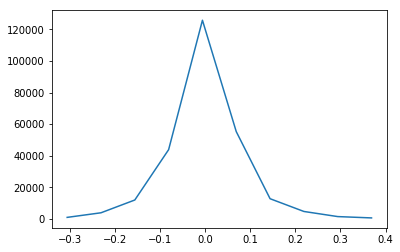

In [97]:
ys,edges = np.histogram( p.xs )
mids =( edges[1:] + edges[:-1]) / 2

plt.plot(mids,ys)

# xs

In [107]:
import itertools
def grouper(iterable, n, fillvalue=None):
    "grouper(3, 'ABCDEFG', 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return itertools.izip_longest(fillvalue=fillvalue, *args)

list(grouper('ABCDEFG',3))

[('A', 'B', 'C'), ('D', 'E', 'F'), ('G', None, None)]

In [117]:
edges =  np.linspace(-.5,.5,50)
mids =( edges[1:] + edges[:-1]) / 2

it  = grouper(p.xs, int(p.bitrate *0.05), 0)
lst = list(it)
for x in it:

    ys, _ = np.histogram( x, bins= edges)

    plt.plot(mids,ys)
# plt.plot(mids,ys)

In [131]:
# print(len(lst))
X = np.array(lst)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)

pobj = pca.fit(X)

X_r = pobj.transform(X)
print(pca.explained_variance_ratio_)  

[ 0.108446    0.08262795  0.06853078]


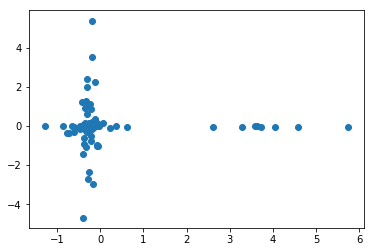

In [128]:
plt.scatter(X_r[:,1],X_r[:,2])

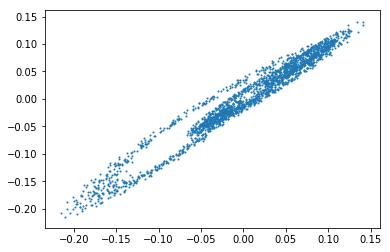

In [157]:
plt.scatter(X[1,1:],X[1,:-1],1)

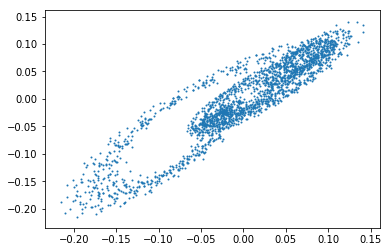

In [158]:
plt.scatter(X[1,2:],X[1,:-2],1)

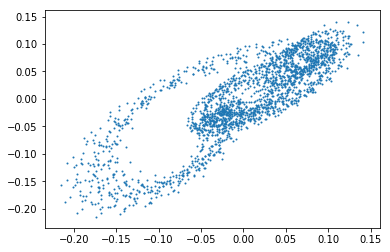

In [160]:
offset = 3
plt.scatter(X[1,offset:],X[1,:-offset],1)

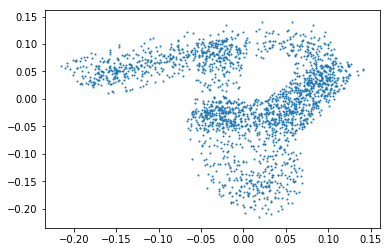

In [162]:
offset = 20
plt.scatter(X[1,offset:],X[1,:-offset],1)

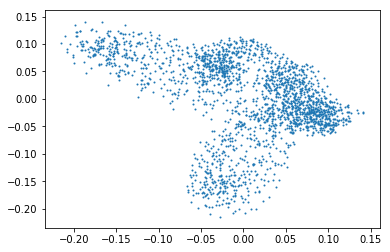

In [171]:
offset = 100
sc  = plt.scatter(X[1,offset:],X[1,:-offset],1)

CPU times: user 312 ms, sys: 264 ms, total: 576 ms
Wall time: 301 ms


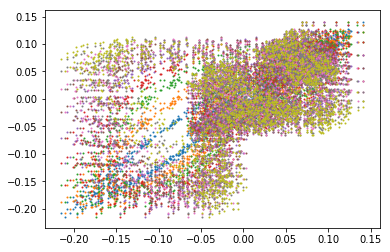

In [192]:
%%time
for i in range(1,10):
    offset = i
    sc.set_paths(plt.scatter(X[1,offset:],X[1,:-offset],1))

In [249]:
# out
np.linspace(0,1,len(x)-i)

array([  0.00000000e+00,   4.55788514e-04,   9.11577028e-04, ...,
         9.99088423e-01,   9.99544211e-01,   1.00000000e+00])

2195


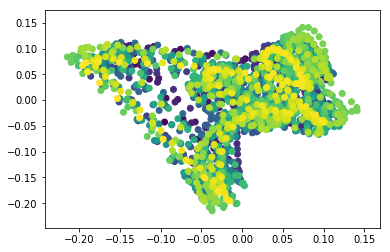

In [253]:
# %%time
# for i in range(1,10):
#     offset = i
#     plt.scatter(X[1,offset:],X[1,:-offset],1)
%matplotlib inline
print( len(x[i:]))
# print len(x)
# print (i)
step = 1./len(x)

sc =  plt.scatter(x[i:],x[:-i]
                  ,c = np.arange(0, len(x)-i) * step
#                  ,c = np.linspace(0,1,len(x)-i)
                 )
i = 10
out = sc.set_offsets(np.c_[x[i:],x[:-i]])
# plt.show(sc)

In [278]:
# np.diff([1,2])
# np.diff(meds[1:,0])
p

array([  6.09387644e-05,   6.09387644e-05,   8.07610340e-05,
         8.07610340e-05,   6.54729083e-05,   6.54729083e-05,
         3.58480029e-05,   3.58480029e-05,   4.84148040e-06,
         4.84148040e-06,   8.70544463e-05,   8.70544463e-05,
         1.58827752e-05,   1.58827752e-05,   5.78882173e-05,
         5.78882173e-05,   2.13733874e-05,   2.13733874e-05,
         1.52005814e-05,   1.52005814e-05,   3.55010852e-05,
         3.55010852e-05,   3.38191167e-05,   3.38191167e-05,
         1.04867388e-04,  -1.04867388e-04,  -3.38191167e-05,
        -3.38191167e-05,  -3.55010852e-05,   3.55010852e-05,
         3.38191167e-05,   3.38191167e-05,   1.04867388e-04,
         1.04867388e-04,   1.48172025e-04,   1.48172025e-04,
         6.76577911e-05,   6.76577911e-05,   4.60437965e-04,
         4.60437965e-04,  -4.60437965e-04,  -4.60437965e-04,
        -6.76577911e-05,  -6.76577911e-05,  -1.48172025e-04,
        -1.48172025e-04,  -1.04867388e-04,  -1.04867388e-04,
        -3.38191167e-05,

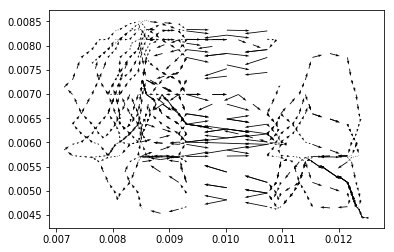

In [280]:
# for i in range():
def f(i):
    return np.median(x[i:]),np.median(x[:-i])
meds = np.array( map(f,range(1,1000)))
# meds[:,0]
# plt.quiver(meds[:,0],meds[:,1])
plt.quiver(meds[1:,0],meds[1:,1],np.diff(meds[1:,0]),np.diff(meds[1:,1]))

TypeError: 'numpy.float32' object cannot be interpreted as an index

In [367]:
it

array([0, 1])

In [ ]:
x[]

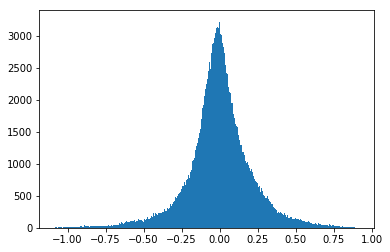

In [379]:
plt.hist( x[:1]-x[1:], 500);

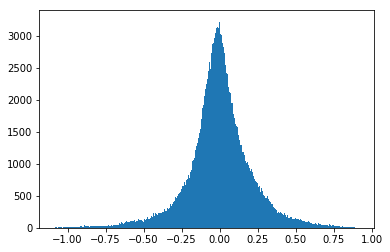

In [378]:
plt.hist( x[:1]-x[1:], 500);

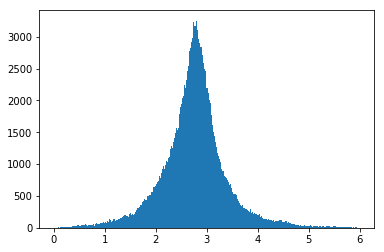

In [369]:
x = p.xs
bw = 2
bw_act = max(x) - min(x)

x = x /bw_act * bw
x = x-min(x)
imax = 2
it = np.arange(0,imax)
X = np.vstack([x[i:-imax+i] for i in it])



###########################
raiser = (bw ** it)[:,None]
plt.hist( (X * raiser).sum(axis = 0), 500);


# X.shape
# x_pad =  x -min(x)
# x_pad

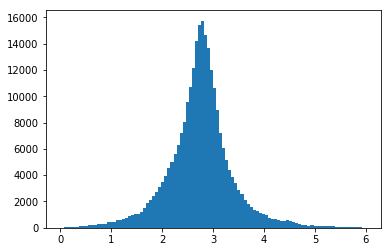

In [371]:
plt.hist((X * raiser).sum(axis = 0),100);

In [263]:
# import stat
# np.median(x)

# median

0.0074472390115261078

In [259]:
i = 11
out = sc.set_offsets(np.c_[x[i:],x[:-i]])
# plt.show(sc)

# print out

In [190]:
# X.shape[1]
# inspect.getsourcelines(sc.set_paths)
# sc.__dict__
# ?sc._paths

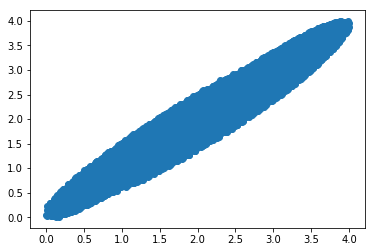

In [380]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()


x = X[1,:]+X[-1,:]
# x = np.arange(0, 2*np.pi, 0.01)
i = 1
sc =  ax.scatter(x[i:],x[:-i])

# line, = ax.plot(x, np.sin(x))


def animate(i):
#     sc.set_paths
#     line.set_ydata(np.sin(x + i/10.0))  # update the data
#     sc = ax.scatter(x[i:],x[:-i])
    sc.set_offsets(np.c_[x[i:],x[:-i]])

    return sc,


# Init only required for blitting to give a clean slate.
def init():
#     line.set_ydata(np.ma.array(x, mask=True))
#     sc =  ax.scatter(x[i:],x[:-i])
    return sc,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 1000), init_func=init,
                              interval=25, blit=True)
# plt.show()
# v = ani.to_html5_video()


In [381]:
ani.save('v_mix.mp4')

In [294]:
# setzero()
# square()
def square_wave(length,per, dur = None):
    if not dur:
        dur = per/2
    return np.arange(length) % per < dur

In [281]:
ipd.Audio(p.xs[::-1] + p.xs,rate = p.bitrate)

In [235]:
ipd.Audio(p.xs[::-1],rate = p.bitrate)

In [301]:
ipd.Audio(p.xs * square_wave(len(p.xs),p.bitrate*1.6),rate = p.bitrate)

In [229]:
ani.save('v.mp4')

In [228]:
ls v.tmp -lh

-rw-rw-r-- 1 shouldsee shouldsee 4.1M Dec  3 18:09 v.tmp


In [226]:
# type(v)
with open('v.tmp','wb') as f:
    f.write(v)

In [223]:
obj_v = ipd.HTML( v )
obj_v

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [220]:
obj_v = ipd.HTML( v )
obj_v

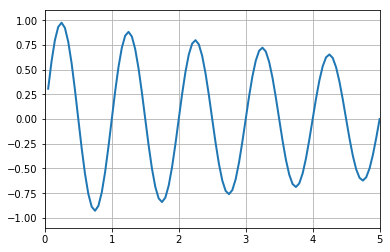

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)
data_gen.t = 0

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(0, 5)
ax.grid()
xdata, ydata = [], []
def run(data):
    # update the data
    t,y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10,
    repeat=False)
# plt.show()
ipd.HTML(ani.to_html5_video())

(array([  2.,   1.,   1.,   6.,   5.,   8.,   6.,  15.,  14.,  25.,  13.,
          9.,   4.,   3.,   4.,   1.,   0.,   0.,   0.,   2.]),
 array([-0.17020181, -0.15029773, -0.13039366, -0.11048958, -0.09058551,
        -0.07068143, -0.05077735, -0.03087328, -0.0109692 ,  0.00893487,
         0.02883895,  0.04874302,  0.0686471 ,  0.08855117,  0.10845525,
         0.12835933,  0.1482634 ,  0.16816748,  0.18807155,  0.20797563,
         0.2278797 ]),
 <a list of 20 Patch objects>)

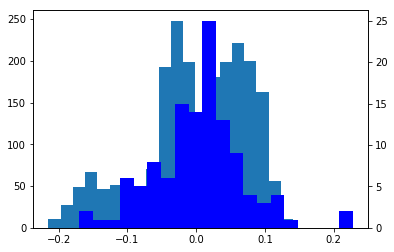

In [155]:
# plt.hist(X[:,1])

plt.hist(X[1,:],20)

axb = plt.twinx()
axb.hist(X[:,1],20,color = 'b')

# X[1,]
# len(X)
# X.shape

In [84]:

# ipd.HTML(
#     ipd.Audio(p.xs, rate = p.bitrate)._repr_html_())

# # p.play()
# ipd.Audio(y, rate = p.bitrate)

In [24]:
# ipd.Audio()
p.play(1,1.1)

<source src="data:audio/wav;base64,UklGRpgiAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YXQiAACUD3gJ+gV1BpALaBQBHyEpiDDaMw4zbi5sJkUcahGoBvD8BvaO82H2zP7jC8gbXy30PYdGT0EjL+4T4fNP1Ce5MaRWmJOX9Z/WrvPBbtWG5vH0bP9+BD4FAgME/sP31PJx8LPwsPPr+Er/ggbFDuYWzRw/H8sd1hhoEiUNzQpxDFgSWBtxJV4uCzSUNTszSS1bJPUZaA9EBY38BPfq9ef5IwNGEJwfXjACPyhEmTtXJxULJ+vfzGezi6BvlxqZ/aK4srnFBti057X0jf1lAdIBwP84+wv2ivJP8U3ypfW2+p4AiweQDyQXShz6Hd8bwRbtEL8MnAtZDuYU7h1qJxovOjNlM/8vPyn2H8oVzwtkArr6fPaa9q37oQXIEtUhAzKxPpxASzVzH5ACOeNqxpSu3J1clwqbHaZ1thTJMNq46Iz0CfwS/3L/jP16+WX1KvPR8lX04/fG/HkCfgmSEdsYhh2sHh8cDBffEakOkg44EkgZRyIeK6YxgjSyM5MvTSjoHhIViQunAtf7ofjA+c//YAqiF7smbzb5QME/9jGiGjj9id75wous4p21mfue+qquu6XNjt0M66r1xPv5/Qb+z/vR93j0BfMY89n0bvge/c4CFAowEhEZFx1zHTUa6xQJEGYNBg5YEsgZrSLeKlkwLjKYMNQrDySPGuoQlgcR/wD5v/by+CMAhgtXGQYpZDjBQKY8sCwQFGX2l9hVvpapbZ3Sm+uiPLCbwTrTe+Jx7yT5J/7H/3P/zfz1+G72wvVg9qz4qvyoAegHyg8GGH8exSEsIRYdaheaElkQlBGJFlseKCeyLiszATSDMcwrLiMtGTYPjwUD/V/30PXs+BYBJA2IG6YrBjqAPxA4diUKC8LsYs/+tdGiIJngmaqiQrEYwzrU3uIv76r3W/sT/NT6WfeE86XxkfHH8tb1gvoyAFkH7w80GCcejSDoHvwZABRdD7EN1A/FFVUeXyeXLm4ylDJXL70oXx/3FLwK7QCy+OrzifMZ+LEB5A5hHhAvIDx3PqkzYB43AnfjlsZAriWdVpaumYGkr7Qcx/nXUOYI8jP5h/sn+6j4P/R/8DvvtO+s8bX1SPvrARYKNxNGG3kgyiH7HjsZ+BKXDqMN0xDgFz0hhSpsMaU0DjTkLzsoBx4jE5IItP4M92/zmvTz+jIGyRSCJWg2eUExQLoxhRmO+1Hc2L+0qP2ZMpYnnCWp7rrYzYjepuyS9yn96P0D/NL3T/KA7oTtSe7o8M31JfybA3sMqRUJHRQh/CDQHB8WgQ9NC/oKFQ8HF+YgFSpfMLcyFjGmK7AigxcBDAYBNvdl8ETuVfG/+d8GHRcdKcc5Q0IJPc0qvA838L7Q7LR6n7WTQpMpnMOrer8701XkvfIa/WABzgB5/b/3ifH57WHtqu5B8j74k/8JCKARyRp5IXUkJiPqHaIW+w87DLgMyhGGGqskeS3rMjA0TjFwKikgFxQGCML8QPOJ7RXtG/J0/DILuhxFL5A+cEO3OZcj4wU15djFEqvPlz6P9JFznSyvFcT+1wjpKvdhAB4DRgGZ/LP1Tu887Ajs1+1L8hL5CQEeCvMTrxyBInIkGCIfHK0Ubw6DCw0NHBNrHHgmii7pMgoz9y71Jugbkg+NA6H4EPDv61ztNvQSAN8P8yH9M8ZAXkE/M/MZq/rt2aq75KKgkoqNJ5PAoOOzF8lt3ObsPPoAAm0DxgBM+/3zLe7160zswe4G9Fv7tAMdDdwW9h7pI/Qk1CGEG10U+Q49DQYQCxe2IGAqgTHFNNsz0y4cJt0a0A5NAyv57/GP77vyBPvVBw0Y5ilvOtBDzD+oLQISEfIU0pO1Vp9Okl2QJZgDp5O6Ac/+4FTwQvxEAoMCOf8c+cPxu+wp67vrj+4v9IH7tAPkDPwVCR3bINYg3xxFFogPGAuRCnkOLhbZH8wo0S4BMTIvgSmOIKYVTwqu/7T2FvGO8FX1yf5ODLQcAC6rPIRCaTpiJb4IaOk/y2exb54ClR2Wyp+0r2DDzNaW5wr2ygCfBYIFOgIr/JP1zPH78OrxO/Un+1kCWwo5E5AbjyFTJFAjoh7xF84RbQ4WD+8TAxxLJS4t4DHeMhkwwCmmIBMWRwtEAS35yPR39Q774QRnEkoiTzJpPlZAUDT5HNj/XeEQxbatoZ0el02a/6Q8tUfIMdqt6SH3lwB3BEEECAEp+4P1zvJe8nXzDffz/M8DhAv4E4QbjSBlIpAgbBv4FL4PqQ2lD3sV6x3JJqgtMTE6McMtFicrHiEU9QmnAIv5XfYU+EH+YQjrFVUlIDTCPSA8AC1GFEb38tmSv5CqEJ31mK+dJamcuevLjdwy6+33XgDDA7sDnwAl+4v2nfRD9GX1HfnI/j8FuAzVFLsbByAvIcUeehmZE4wP6w5LEhwZ2CE5Kg8wgjKrMZQtryb/HWoUwwojAgT8+vmM/D8Dyw2CG54qXTiyP+E6UCm1D+jyita2vYeqDJ/HnK6i5q6mv0/REuFN72X77AL8BfAFpAJs/YH5uff69tn3TPteAEQGaw0aFU8b4B5WH1Qc8BalEaYOPw+3EycbyCNEK7gvzDDJLsQpWCKDGfUPfAZa/hv5DPhW+6ECzw3jG+cqyjfqPDI1niFBB2zqrc75ti6lcpvrmj+iyK9Twe/SqOIX8dD8wQO9BqEGLwNh/hH7TPlP+Cr5f/w4AfoGRA7xFeIbKh9VHyQcEResEuUQxxJTGE4gsCgdLxoyvzFyLlkoNSDwFiANrAMD/Kv3jveb+7oDvg9JHkwtPznqOzQxjRsAAIbi08afr76ehpa3l72g9q+BwlbUYOT18gP+MgTLBiYGTQK//bX6w/ik95n44PttAFkGCw7fFbsb6h7zHsQbNRfPEzwTWBbfHEElOy2AMgg0TDK5LYYmlB2/E5sJPgBB+QP2Avch/H0FlxK+Id8wtDuYO8wt7xXP+Fzadr6Mp5qXJpFslKCf3bB7xLLWH+d79XL/oAR1BuoElQAz/FH5Vfdn9rT3G/vE/ycGYg5bFh4cMx8QH+cb5RdvFfcVNRqZIT0qrjHLNQQ2FTNbLSMlZhv6EIwGbv1R91P1l/cW/vAIKhf0Jh02XT8CPPcqrhC28T3SKLaXn+eQnoxLkuSfBLNax6/ZB+pn97P/fQMXBFkBePws+Gn1lfMY89n0bfhK/SUEpwxcFKgZQByRGycYdBSrEhQURhlWIQsq3DDoMxYzOC+PKH0fExUoCpX/6vbm8VHxEfVE/dEJPhnUKfc4PkB+OWwl7wh56JjI8axtl+WKiYkfkl+iQbcWzG7eZ+5y+hUBqQMyA6P/vvoE9/D09fOC9Cj3UPu+AD0I4RAQGK0ciB4PHUYZ0BWiFOwWEx3FJYMuxjQEN3w19jCLKbcfnhQiCVL+Avbp8Xvyh/dEASsPbx+EMP0+cEPaOKEh1gIG4QTB8qXAkayHL4lNlIOmJ7yP0Cbi4/Ds+qX/1AAn/9T6Cvb38rrxxfFw8/j2rvulAYQJxRHxF3cbJhyKGTgV5xFTEZcUzxs5JScuLDQYNmU0qC/ZJ5IdBhInBkb7ePNc8B7ymfj7AzgTcyQiNqFD8kTANtEcOPzI2VK6XaAgjv2GZIvGmGysIMKi1SnmWPNU+2b+af65+/b2kfJe8C7wZfFA9LP4CP6OBJQMEBTxGCAbUhpkFoERWg54Dt8SRht8JcMu2TThNmU1tTC1KCEeNxL/BRb7zPOb8Xz0a/xnCewZPCx3PoVKdEjqNqUasfg11qq3GJ8ujwyL/5EjoYy1p8rt3Czsm/eg/Tj/Df5T+iP1DfGL7yvwSPIO9jD7+gDcB6EP5hUsGakZ8BZhEb0LkghECbIOExjhImMsjjLANHMzsC5YJk0b1A4WAgH3FvCd7nvyzftDCgwckS8hQj9MukY4MgQUOvE5z

In [25]:
# p.trimto(1,1.05)

In [35]:
wid = 0.1 #### 100ms

x = p.trimto(0,wid)
print len(x[0])
### downsample to 44.1kbps

4410


In [ ]:
y = xxx

In [ ]:

########
## data_preparation
def preprocess(filename):
    pass


def synthesize()

midi_list = map( preprocess, filelist )

In [37]:
# x[1]
import tensorflow
import keras

Using TensorFlow backend.


NameError: name 'wid' is not defined

In [28]:
xre = generate_sine(ft,p.bitrate)
import IPython.display as ipd
ipd.Audio(xre, rate = p.bitrate)

NameError: name 'ft' is not defined